<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Simple_linear_regression_fuel_consumption_data_project_coursera_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

## STEP #1: LIBRARIES IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## STEP #2: IMPORT DATASET

In [ ]:
fueleconomy_df = pd.read_csv("https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/FuelEconomy.csv")
# You can get the dataset ("FuelEconomy.csv") in this link: https://github.com/harishmuh/machine_learning_practices/blob/main/datasets/FuelEconomy.csv

In [ ]:
fueleconomy_df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [ ]:
fueleconomy_df.head(6)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571


In [ ]:
fueleconomy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [ ]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [ ]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## STEP#3: VISUALIZE DATASET

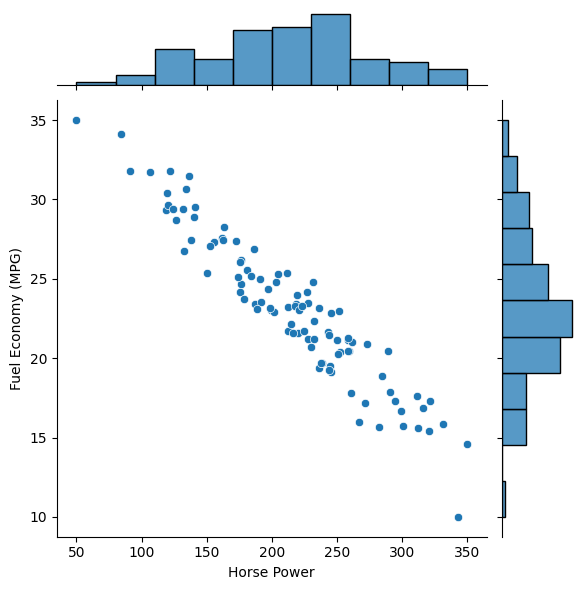

In [ ]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data = fueleconomy_df)

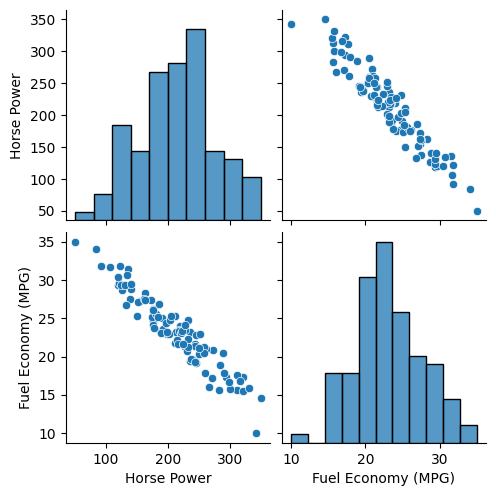

In [ ]:
sns.pairplot(fueleconomy_df)

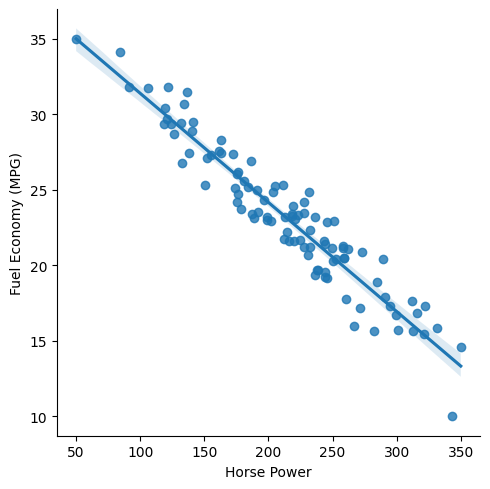

In [ ]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fueleconomy_df)

## STEP#4: CREATE TESTING AND TRAINING DATASET

In [ ]:
X = fueleconomy_df[['Horse Power']]

In [ ]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [ ]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [ ]:
y

,Fuel Economy (MPG)
0,29.344195
1,24.695934
2,23.952010
3,23.384546
4,23.426739
...,...
95,27.418661
96,15.989945
97,19.253375
98,29.515593


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## STEP#5: TRAIN THE MODEL

In [ ]:
X_train.shape

(75, 1)

In [ ]:
X_test.shape

(25, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression(fit_intercept =True)

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.07132794]
Linear Model Coefficient (b):  38.44436572676453


## STEP#6: TEST THE MODEL

In [ ]:
y_predict = regressor.predict( X_test)
y_predict

array([22.85248175, 18.28678694, 21.05238767, 29.97268929, 22.52542106,
       25.08392862, 16.97079106, 16.1549401 , 21.08686604, 29.44199449,
       19.08299496, 26.03763257, 22.22580982, 27.35890768, 24.81367032,
       24.23957491, 19.76699409, 21.01478847, 20.51077362, 25.8921305 ,
       23.14562864, 29.7394924 , 22.8872369 , 30.86523302, 20.91050248])

In [ ]:
y_test

,Fuel Economy (MPG)
4,23.426739
33,15.676316
97,19.253375
0,29.344195
70,23.307192
3,23.384546
35,15.725650
32,15.618956
24,21.623369
8,28.718210


Text(0.5, 1.0, 'HP vs. MPG (Training dataset)')

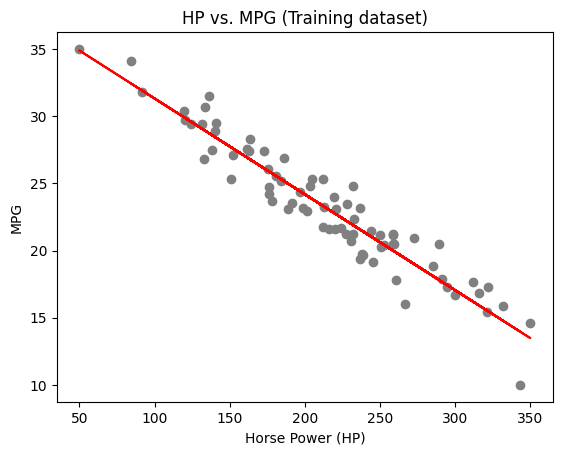

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')

Text(0.5, 1.0, 'HP vs. MPG (Testing dataset)')

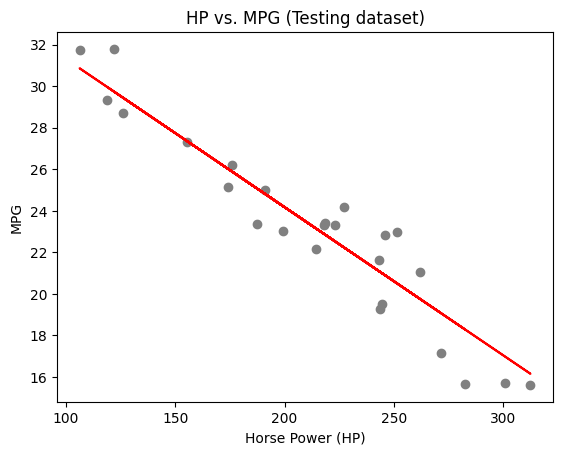

In [ ]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')

In [ ]:
HP = [[240]]
y_predict = regressor.predict(HP)
y_predict

array([21.32566008])